In [27]:
%reload_ext autoreload
%autoreload 2

import os
import argparse
import sys
import time

import numpy as np
from multiprocess import Pool

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

%matplotlib inline

In [28]:
stack = 'UCSD001'

atlas_spec = dict(name='atlasV7',
                   vol_type='score'    ,               
                    resolution='10.0um'
                   )

# atlas_spec = dict(name='atlasV6',
#                    vol_type='score'    ,               
#                     resolution='10.0um'
#                    )

In [29]:
atlas_structures_wrt_canonicalAtlasSpace_atlasResol = \
DataManager.load_original_volume_all_known_structures_v3(atlas_spec, in_bbox_wrt='canonicalAtlasSpace',
                                                        out_bbox_wrt='canonicalAtlasSpace')

Prior structure/index map not found. Generating a new one.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_5N_L.bp
[Errno 2] No such file or directory: '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_5N_L.bp'
Score volume for 5N_L does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_5N_R.bp
[Errno 2] No such file or directory: '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_5N_R.bp'
Score volume for 5N_R does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_volumes/atlasV7/atlasV7_10.0um_scoreVolume/score_volumes/atlasV7_10.0um_scoreVolume_6N_L.bp
[Errno 2] No s

# Identify 3-d bounding box of each simpleGlobal aligned structure

In [30]:
bp.unpack_ndarray_file(os.path.join(DATA_ROOTDIR, 'CSHL_simple_global_registration', \
                                stack + '_T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol.bp'))

array([[ 9.75061546e-01,  2.21337993e-01,  1.64236256e-02,
         1.17874282e+03],
       [-2.21085932e-01,  9.75128045e-01, -1.58609041e-02,
         5.59443355e+02],
       [-1.95256559e-02,  1.18342629e-02,  9.99739316e-01,
         5.29000000e+02]])

In [31]:
# for stack in all_nissl_stacks:
# for stack in ['MD661']:
for stack in ['UCSD001']:

    T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol = \
    bp.unpack_ndarray_file(os.path.join(DATA_ROOTDIR, 'CSHL_simple_global_registration', \
                                stack + '_T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol.bp'))

    registered_atlas_structures_wrt_wholebrain_atlasResol = \
    {name_s: transform_volume_v4(volume=vo,
                                 transform=T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol, 
                                 return_origin_instead_of_bbox=True)
    for name_s, vo in atlas_structures_wrt_canonicalAtlasSpace_atlasResol.iteritems()}

    registered_atlas_structures_bbox_wrt_wholebrain_atlasResol = \
    {name_s: (o[0], o[0] + v.shape[1] - 1, o[1], o[1] + v.shape[0] - 1, o[2], o[2] + v.shape[2] - 1)
    for name_s, (v, o) in registered_atlas_structures_wrt_wholebrain_atlasResol.iteritems()}

    registered_atlas_structures_xyzTwoCorners_wrt_wholebrain_atlasResol = \
    {name_s: ((o[0], o[2], o[4]), (o[1], o[3], o[5]))
    for name_s, o in registered_atlas_structures_bbox_wrt_wholebrain_atlasResol.iteritems()}

#     registered_atlas_structures_xyzCorners_wrt_wholebrainWithMargin_atlasResol = \
#     {name_s: ((o[0], o[2], o[4]), (o[0], o[2], o[5]), (o[0], o[3], o[4]), (o[0], o[3], o[5]), \
#              (o[1], o[2], o[4]), (o[1], o[2], o[5]), (o[1], o[3], o[4]), (o[1], o[3], o[5]))
#     for name_s, o in registered_atlas_structures_bbox_wrt_wholebrainWithMargin_atlasResol.iteritems()}

    
    atlas_resol = atlas_spec['resolution']
    
    from data_manager import CoordinatesConverter

    converter = CoordinatesConverter(stack=stack)

    registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners_raw = {}

    for name_s, corners_xyz in registered_atlas_structures_xyzTwoCorners_wrt_wholebrain_atlasResol.iteritems():
    #     print name_s
        registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners_raw[name_s] = \
        converter.convert_frame_and_resolution(p=corners_xyz, 
                                           in_wrt=('wholebrain', 'sagittal'),
                                          in_resolution=atlas_resol,
                                          out_wrt=('wholebrainXYcropped', 'sagittal'),
                                          out_resolution='raw_raw_section').astype(np.int)

    save_json(registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners_raw, 
          os.path.join(DATA_ROOTDIR, 'CSHL_simple_global_registration', \
                       stack + '_registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners.json'))

Interpolating/filling sparse volume: 0.02 seconds.
Interpolating/filling sparse volume: 0.00 seconds.
Interpolating/filling sparse volume: 0.06 seconds.
Seems you are using operation INIs to provide cropbox.


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini


## Testing ---

`atlas_structures_wrt_canonicalAtlasSpace_atlasResol` loaded from `STACK_T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol.bp` file
    - shape (78, 124, 86)

-> converted to `registered_atlas_structures_wrt_wholebrain_atlasResol`
    - shape (71, 142, 91)
    
-> bounding box is generated from this, `registered_atlas_structures_bbox_wrt_wholebrain_atlasResol`
    - '12N': (1301, 1442, 546, 616, 170, 260)
    - loaded into `corners_xyz`, same data, different format
        - ((1301, 546, 170), (1442, 616, 260))

-> transformed with "converter.convert_frame_and_resolution()" saved to `STACK_registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners.json`
    - 12N: [[16990, 11360, 86],
            [21329, 13513, 131]]
            
-> Rang of sections values are computed for: 
    - lower_bound: max(secmin - section_margin, valid_secmin),
    - upper_bound: min(secmax + 1 + section_margin, valid_secmax)+1
    - (section_margin = int(section_margin_um / SECTION_THICKNESS)) where section_margin_um=400

In [14]:
secmin - section_margin, valid_secmin

NameError: name 'valid_secmin' is not defined

In [194]:
secmax + 1 + section_margin, valid_secmax

(157, 360)

(78, 124, 86)


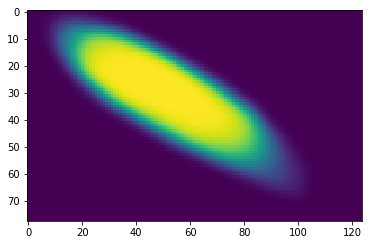

In [195]:
print shape(atlas_structures_wrt_canonicalAtlasSpace_atlasResol['12N'][0])

imshow( atlas_structures_wrt_canonicalAtlasSpace_atlasResol['12N'][0][:,:,70] ) 

['3N_R', '4N_R', '12N']
(69, 140, 87)


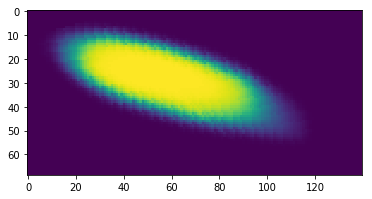

In [196]:
print registered_atlas_structures_wrt_wholebrain_atlasResol.keys()
print shape( registered_atlas_structures_wrt_wholebrain_atlasResol['12N'][0])
imshow( registered_atlas_structures_wrt_wholebrain_atlasResol['12N'][0][:,:,70] ) 

In [197]:
registered_atlas_structures_bbox_wrt_wholebrain_atlasResol

{'12N': (1308, 1447, 548, 616, 516, 602),
 '3N_R': (972, 1041, 466, 520, 551, 603),
 '4N_R': (1029, 1052, 476, 502, 577, 598)}

In [198]:
corners_xyz

((1308, 548, 516), (1447, 616, 602))

In [199]:
registered_atlas_structures_xyzTwoCorners_wrt_wholebrain_atlasResol

{'12N': ((1308, 548, 516), (1447, 616, 602)),
 '3N_R': ((972, 466, 551), (1041, 520, 603)),
 '4N_R': ((1029, 476, 577), (1052, 502, 598))}

In [200]:
registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners

{u'12N': [[16990, 11360, 86], [21329, 13513, 131]],
 u'3N_R': [[6836, 8590, 112], [8960, 10221, 139]],
 u'4N_R': [[8590, 8929, 125], [9329, 9729, 136]]}

In [201]:
registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners_raw

{'12N': array([[17206, 11421,   259],
        [21483, 13513,   302]]), '3N_R': array([[ 6867,  8898,   276],
        [ 8990, 10560,   302]]), '4N_R': array([[ 8621,  9206,   289],
        [ 9329, 10006,   300]])}

## Testing ---

In [32]:
batch_size = 256
model_dir_name = 'inception-bn-blue'
model_name = 'inception-bn-blue'
model, mean_img = load_mxnet_model(model_dir_name=model_dir_name, model_name=model_name, 
                                   num_gpus=1, batch_size=batch_size)

ENABLE_DOWNLOAD_S3 is False. Skip downloading from S3.
/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:53: UserWarning: You created Module with Module(..., label_names=['softmax_label']) but input with name 'softmax_label' is not found in symbol.list_arguments(). Did you mean one of:
	data
  warnings.warn(msg)
/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:65: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['softmax_label'])
  warnings.warn(msg)


In [33]:
# out_resolution_um = 10.
# out_resolution_str = '%.1fum' % out_resolution_um

# detector_id = 15 # For CSHL nissl data. e.g. MD593
# detector_id = 19 # For CSHL nissl data. e.g. MD589, denser window
detector_id = 799 # For UCSD neurotrace data, e.g. CHATM2, CHATM3

# print 'input_version:', detector_settings.loc[detector_id]['input_version']


bg_img_version = 'NtbNormalizedAdaptiveInvertedGammaJpeg'

In [34]:
# detector_setting = {}
# detector_setting['feature_classifier_id'] = 899
# detector_setting['windowing_id'] = 7

detector_setting = detector_settings.loc[detector_id]
clfs = DataManager.load_classifiers(classifier_id=detector_setting['feature_classifier_id'])
win_id = detector_setting['windowing_id']

Setting 899: No classifier found for 5N.
Setting 899: No classifier found for 6N.
Setting 899: No classifier found for 7N.
Setting 899: No classifier found for 7n.
Setting 899: No classifier found for Amb.
Setting 899: No classifier found for LC.
Setting 899: No classifier found for LRt.
Setting 899: No classifier found for Pn.
Setting 899: No classifier found for Tz.
Setting 899: No classifier found for VLL.
Setting 899: No classifier found for RMC.
Setting 899: No classifier found for SNC.
Setting 899: No classifier found for SNR.
Setting 899: No classifier found for Sp5I.
Setting 899: No classifier found for Sp5O.
Setting 899: No classifier found for Sp5C.
Setting 899: No classifier found for PBG.
Setting 899: No classifier found for 10N.
Setting 899: No classifier found for VCA.
Setting 899: No classifier found for VCP.
Setting 899: No classifier found for DC.
Setting 899: No classifier found for AP.
Setting 899: No classifier found for RtTg.
Setting 899: No classifier found for SC

In [37]:
# motor_nuclei = ['Amb', '3N', '4N', '5N', '6N', '7N', '10N', '12N']
# motor_nuclei = ['SNR', '7N', '5N', '7n', 'LRt', 'Sp5C', 'SNC', 'VLL', 'SC', 'IC']
motor_nuclei = ['12N', '3N', '4N']

normalization_scheme = "none"

In [36]:
structure = '12N'

(xmin, ymin, secmin), (xmax, ymax, secmax) = \
                registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners[structure]
    
print secmin
print secmax

NameError: name 'registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners' is not defined

In [39]:
print max(secmin - section_margin, valid_secmin)
print min(secmax + 1 + section_margin, valid_secmax)+1

239
324


In [38]:
section_margin_um = 400.
section_margin = int(section_margin_um / SECTION_THICKNESS)
valid_secmin = np.min(metadata_cache['valid_sections'][stack])
valid_secmax = np.max(metadata_cache['valid_sections'][stack])

In [40]:
# for stack in ['CHATM2', 'CHATM3']:
# for stack in all_nissl_stacks:
# for stack in ['MD661']:
# for stack in ['DEMO998']:
for stack in ['UCSD001']:
    
    output_resolution = '10.0um'
    out_resolution_um = convert_resolution_string_to_um(resolution=output_resolution, stack=stack)
    
    valid_secmin = np.min(metadata_cache['valid_sections'][stack])
    valid_secmax = np.max(metadata_cache['valid_sections'][stack])
    print "valid Minimum section: "+str(valid_secmin)
    print "valid Maximum section: "+str(valid_secmax)
    
    ######## Do not use ROI ######

#     raw_w, raw_h = metadata_cache['image_shape'][stack]
    
#     registered_atlas_structures_wrt_wholebrainXYcropped_bboxes_perSection = defaultdict(dict)
    
#     for name_u in motor_nuclei:
#         for sec in range(valid_secmin, valid_secmax+1):  
#             if is_invalid(sec=sec, stack=stack):
#                 continue
            
#             registered_atlas_structures_wrt_wholebrainXYcropped_bboxes_perSection[name_u][sec] = \
#(0,raw_w-1,0,raw_h-1)

    ######## Identify ROI based on simple global alignment ########

    registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners = \
load_json(os.path.join(DATA_ROOTDIR, 'CSHL_simple_global_registration', \
                       stack + '_registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners.json'))

    registered_atlas_structures_wrt_wholebrainXYcropped_bboxes_perSection = defaultdict(dict)

#     section_margin_um = 1000.
    section_margin_um = 400.
    section_margin = int(section_margin_um / SECTION_THICKNESS)
    
    image_margin_um = 2000.
    image_margin = int(np.round(image_margin_um / convert_resolution_string_to_um('raw', stack)))

#     for name_u in all_known_structures:
    for name_u in motor_nuclei:
        # singular_structures == ['AP', '12N', 'RtTg', 'SC', 'IC']
        if name_u in singular_structures:

            (xmin, ymin, secmin), (xmax, ymax, secmax) = \
            registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners[name_u]
            
            print 'Singular Structure: '+name_u
            print '(xmin, ymin, secmin), (xmax, ymax, secmax)'
            print registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners[name_u]

            for sec in range(max(secmin - section_margin, valid_secmin), \
                             min(secmax + 1 + section_margin, valid_secmax)+1):
                
                if is_invalid(sec=sec, stack=stack):
                    print 'INVALID'
                    continue

                registered_atlas_structures_wrt_wholebrainXYcropped_bboxes_perSection[name_u][sec] = \
                (max(xmin - image_margin, 0), 
                 xmax + image_margin, 
                 max(ymin - image_margin, 0), 
                 ymax + image_margin)
#                 print 'registered_atlas_structures_wrt_wholebrainXYcropped_bboxes_perSection'
#                 print registered_atlas_structures_wrt_wholebrainXYcropped_bboxes_perSection[name_u][sec]
        # If structure exists on right and left hemispheres
        else:

            a = defaultdict(list)

            lname = convert_to_left_name(name_u)        
            
            if lname in registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners:

                (xmin, ymin, secmin), (xmax, ymax, secmax) = \
                registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners[lname]
                
#                 print 'Twin Structures: '+name_u
#                 print '(xmin, ymin, secmin), (xmax, ymax, secmax)'

                for sec in range(max(secmin - section_margin, valid_secmin), \
                                 min(secmax + 1 + section_margin, valid_secmax)+1):

                    if is_invalid(sec=sec, stack=stack):
                        continue

                    a[sec].append((max(xmin - image_margin, 0), 
                     xmax + image_margin, 
                     max(ymin - image_margin, 0), 
                     ymax + image_margin))

            rname = convert_to_right_name(name_u)
            
            if rname in registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners:

                (xmin, ymin, secmin), (xmax, ymax, secmax) = \
                registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners[rname]

                for sec in range(max(secmin - section_margin, valid_secmin), \
                                 min(secmax + 1 + section_margin, valid_secmax)+1):

                    if is_invalid(sec=sec, stack=stack):
                        continue

                    a[sec].append((max(xmin - image_margin, 0), 
                     xmax + image_margin, 
                     max(ymin - image_margin, 0), 
                     ymax + image_margin))

            for sec, bboxes in a.iteritems():
                if len(bboxes) == 1:
                    registered_atlas_structures_wrt_wholebrainXYcropped_bboxes_perSection[name_u][sec] = \
                    bboxes[0]
                else:
                    xmin, ymin = np.min(bboxes, axis=0)[[0,2]]
                    xmax, ymax = np.max(bboxes, axis=0)[[1,3]]
                    registered_atlas_structures_wrt_wholebrainXYcropped_bboxes_perSection[name_u][sec] = \
                    (xmin, xmax, ymin, ymax)
                    
    ######### Generate score maps ###########
                    
#     for name_u in all_known_structures:
    for name_u in motor_nuclei:
            
        for sec, bbox in sorted(registered_atlas_structures_wrt_wholebrainXYcropped_bboxes_perSection\
                                [name_u].items()):
            
    #         if is_invalid(sec=sec, stack=stack):
    #             continue
        
            print name_u, sec
        
            try:
                
                ############# Generate both scoremap and viz #################
                
                viz_all_landmarks, scoremap_all_landmarks = \
                draw_scoremap(clfs={name_u: clfs[name_u]}, 
                                      bbox=bbox,
                                scheme=normalization_scheme, 
                            win_id=win_id, prep_id=2,
                            stack=stack, 
                              return_what='both',
                              sec=sec,
                            model=model, model_name=model_name,
                             mean_img=mean_img, 
                             batch_size=batch_size,
                              output_patch_size=224,
                              is_nissl=False,
                           out_resolution_um=out_resolution_um,
                                            bg_img_version=bg_img_version,
                        image_shape=metadata_cache['image_shape'][stack],
                                      return_wholeimage=True)
                

                sm = scoremap_all_landmarks[name_u]
                viz = viz_all_landmarks[name_u]

                t = time.time()
                scoremap_bp_filepath = \
                DataManager.get_downscaled_scoremap_filepath(stack=stack, section=sec, 
                                                             structure=name_u,
                                                             detector_id=detector_id,
                                                             out_resolution_um=out_resolution_um)
                save_data(sm.astype(np.float16), scoremap_bp_filepath, upload_s3=False)
                sys.stderr.write('Save scoremap: %.2f seconds\n' % (time.time() - t))

                t = time.time()
                viz_filepath = \
                DataManager.get_scoremap_viz_filepath_v2(stack=stack, section=sec, 
                                                             structure=name_u,
                                                             detector_id=detector_id,
                                                             out_resolution=output_resolution)
                save_data(viz, viz_filepath, upload_s3=False)
                sys.stderr.write('Save scoremap viz: %.2f seconds\n' % (time.time() - t))
                
                del viz_all_landmarks, scoremap_all_landmarks
                
                ################ Generate scoremap only ################
        
#                 scoremap_all_landmarks = \
#                 draw_scoremap(clfs={name_u: clfs[name_u]}, 
#                                       bbox=bbox,
#                                 scheme='none', 
#                             win_id=win_id, prep_id=2,
#                             stack=stack, 
#                               return_what='scoremap',
#                               sec=sec,
#                             model=model, model_name=model_name,
#                              mean_img=mean_img, 
#                              batch_size=batch_size,
#                               output_patch_size=224,
#                               is_nissl=False,
#                            out_resolution_um=out_resolution_um,
#                         image_shape=metadata_cache['image_shape'][stack],
#                                       return_wholeimage=True)

#                 sm = scoremap_all_landmarks[name_u]

#                 scoremap_bp_filepath = \
#                 DataManager.get_downscaled_scoremap_filepath(stack=stack, section=sec, 
#                                                              structure=name_u,
#                                                              detector_id=detector_id,
#                                                              out_resolution_um=out_resolution_um)
#                 save_data(sm.astype(np.float16), scoremap_bp_filepath, upload_s3=False)

#                 del scoremap_all_landmarks
        
            except Exception as e:
                sys.stderr.write('************************************************************************\n')
                sys.stderr.write('!!!!!!!!!!! Scoremap generation FAILED: %s\n' % e)
                continue

        
    ######### Generate score volumes ##########
        
# #     for name_u in all_known_structures:
#     for name_u in motor_nuclei:

        for name_s in [convert_to_left_name(name_u), convert_to_right_name(name_u)]:

            scoremaps = {}

    #         for sec in metadata_cache['valid_sections'][stack]:

            if name_s not in registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners:
                sys.stderr.write("Score volume ROI derived from simple global alignment does not exist. \
                Skip generating score volume.\n")
                continue
          
            (xmin, ymin, s1), (xmax, ymax, s2) = \
            registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners[name_s]

            for sec in range(max(s1 - section_margin, metadata_cache['section_limits'][stack][0]), 
                             min(s2 + 1 + section_margin, metadata_cache['section_limits'][stack][1])+1):

                if is_invalid(sec=sec, stack=stack):
                    continue
                
                try:
                    scoremap = DataManager.load_downscaled_scoremap(stack=stack, section=sec, structure=name_u, 
                                                                    prep_id='alignedBrainstemCrop',
                                                                  out_resolution_um=out_resolution_um, 
                                                                    detector_id=detector_id).astype(np.float32)
                except Exception as e:
                    sys.stderr.write('%s\n' % e)
                    continue
                    
                mask = DataManager.load_image_v2(stack=stack, section=sec, 
                                     prep_id='alignedBrainstemCrop', 
                                     resol='thumbnail', version='mask')

                mask_outResol = rescale_by_resampling(mask, new_shape=(scoremap.shape[1], scoremap.shape[0]))

                scoremap[~mask_outResol] = 0
                scoremaps[sec] = scoremap
                
            t = time.time()

            volume_outVolResol, volume_origin_wrt_wholebrainXYcropped_outVolResol = \
            images_to_volume_v2(images=scoremaps, spacing_um=20.,
                                    in_resol_um=out_resolution_um,
                                    out_resol_um=out_resolution_um)

            sys.stderr.write('Images to volume: %.2f seconds\n' % (time.time() - t))

            brain_spec = dict(name=stack,
                           vol_type='score',
                            detector_id=detector_id,
                           resolution=output_resolution)

            # Save volume and origin.

            t = time.time()
            save_data(volume_outVolResol.astype(np.float16), \
                      DataManager.get_original_volume_filepath_v2(stack_spec=brain_spec, structure=name_s))

            wholebrainXYcropped_origin_wrt_wholebrain_outVolResol = \
            DataManager.get_domain_origin(stack=stack, domain='wholebrainXYcropped', 
                                          resolution=output_resolution)
            volume_origin_wrt_wholebrain_outVolResol =\
            volume_origin_wrt_wholebrainXYcropped_outVolResol + \
            wholebrainXYcropped_origin_wrt_wholebrain_outVolResol

            save_data(volume_origin_wrt_wholebrain_outVolResol,
                      DataManager.get_original_volume_origin_filepath_v3(stack_spec=brain_spec, \
                                                                         structure=name_s, wrt='wholebrain'))

            sys.stderr.write('Save score volume: %.2f seconds\n' % (time.time() - t))
            
            # Compute gradients.

            t = time.time()
            gradients = compute_gradient_v2((volume_outVolResol, volume_origin_wrt_wholebrain_outVolResol), 
                                            smooth_first=True)
            sys.stderr.write('Compute gradient: %.2f seconds\n' % (time.time() - t))

            t = time.time()
            DataManager.save_volume_gradients(gradients, stack_spec=brain_spec, structure=name_s)
            sys.stderr.write('Save gradient: %.2f seconds\n' % (time.time() - t))

valid Minimum section: 105
valid Maximum section: 360
Singular Structure: 12N
(xmin, ymin, secmin), (xmax, ymax, secmax)
[[17667, 11390, 241], [21913, 13544, 284]]
INVALID
INVALID
INVALID
INVALID
12N 221
['UCSD001', 221, 'UCSD001_slide055_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide055_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide055_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide055_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
21169 ROI sampled locations
53356 pre-computed locations


Load pre-computed features: 6.29 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide055_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.45 seconds
/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
Rescale background image to output resolution: 10.26 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resi

(719, 1103, 3) (719, 1103)
12N 222


Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide056_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 222, 'UCSD001_slide056_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide056_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide056_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
19453 ROI sampled locations
53015 pre-computed locations


Load pre-computed features: 6.51 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide056_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.38 seconds
Rescale background image to output resolution: 10.22 seconds
Predict scores 12N: 0.11 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 223


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide055_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 223, 'UCSD001_slide055_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide055_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide055_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
20890 ROI sampled locations
52714 pre-computed locations


Load pre-computed features: 6.60 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide055_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.27 seconds
Rescale background image to output resolution: 10.73 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.18 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide056_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.04 seconds


12N 224
['UCSD001', 224, 'UCSD001_slide056_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide056_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide056_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
21207 ROI sampled locations
54568 pre-computed locations


Load pre-computed features: 6.75 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide056_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.49 seconds
Rescale background image to output resolution: 9.44 seconds
Predict scores 12N: 0.19 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 225


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide057_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 225, 'UCSD001_slide057_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide057_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide057_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20950 ROI sampled locations
55684 pre-computed locations


Load pre-computed features: 7.09 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide057_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.34 seconds
Rescale background image to output resolution: 9.55 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 226


Generate scoremap overlay image 12N: 0.23 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide058_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.20 seconds


['UCSD001', 226, 'UCSD001_slide058_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide058_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide058_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
21101 ROI sampled locations
54520 pre-computed locations


Load pre-computed features: 6.83 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide058_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.22 seconds
Rescale background image to output resolution: 9.70 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.12 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 227


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide057_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 227, 'UCSD001_slide057_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide057_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide057_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
21251 ROI sampled locations
55475 pre-computed locations


Load pre-computed features: 6.97 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide057_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.28 seconds
Rescale background image to output resolution: 9.23 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 228


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide058_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.08 seconds


['UCSD001', 228, 'UCSD001_slide058_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide058_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide058_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
21130 ROI sampled locations
53556 pre-computed locations


Load pre-computed features: 7.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide058_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.81 seconds
Rescale background image to output resolution: 9.76 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 229


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide058_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 229, 'UCSD001_slide058_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide058_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide058_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
17904 ROI sampled locations
48435 pre-computed locations


Load pre-computed features: 6.02 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide058_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.04 seconds
Rescale background image to output resolution: 10.61 seconds
Predict scores 12N: 0.10 seconds
Resample scoremap 12N: 0.12 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 230


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide057_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 230, 'UCSD001_slide057_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide057_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide057_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
21365 ROI sampled locations
54795 pre-computed locations


Load pre-computed features: 6.76 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide057_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.18 seconds
Rescale background image to output resolution: 10.07 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 231


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide058_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 231, 'UCSD001_slide058_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide058_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide058_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
21155 ROI sampled locations
55387 pre-computed locations


Load pre-computed features: 6.96 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide058_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.17 seconds
Rescale background image to output resolution: 9.48 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 232


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide057_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 232, 'UCSD001_slide057_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide057_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide057_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
21280 ROI sampled locations
54974 pre-computed locations


Load pre-computed features: 6.84 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide057_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.20 seconds
Rescale background image to output resolution: 9.70 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 234


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide060_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.09 seconds


['UCSD001', 234, 'UCSD001_slide060_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide060_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide060_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
21267 ROI sampled locations
53102 pre-computed locations


Load pre-computed features: 6.71 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide060_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.49 seconds
Rescale background image to output resolution: 9.92 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.09 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 235


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide059_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 235, 'UCSD001_slide059_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide059_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide059_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20994 ROI sampled locations
54951 pre-computed locations


Load pre-computed features: 6.79 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide059_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.09 seconds
Rescale background image to output resolution: 10.08 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 236


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide060_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 236, 'UCSD001_slide060_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide060_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide060_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
21161 ROI sampled locations
55303 pre-computed locations


Load pre-computed features: 6.89 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide060_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.17 seconds
Rescale background image to output resolution: 9.90 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 237


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide059_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 237, 'UCSD001_slide059_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide059_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide059_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
21184 ROI sampled locations
55261 pre-computed locations


Load pre-computed features: 6.95 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide059_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.14 seconds
Rescale background image to output resolution: 9.94 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.17 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide060_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.04 seconds


12N 238
['UCSD001', 238, 'UCSD001_slide060_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide060_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide060_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
21126 ROI sampled locations
53149 pre-computed locations


Load pre-computed features: 6.62 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide060_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.35 seconds
Rescale background image to output resolution: 9.69 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 239


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide059_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 239, 'UCSD001_slide059_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide059_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide059_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
17739 ROI sampled locations
52447 pre-computed locations


Load pre-computed features: 6.44 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide059_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.04 seconds
Rescale background image to output resolution: 9.97 seconds
Predict scores 12N: 0.11 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 240
['UCSD001', 240, 'UCSD001_slide060_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide060_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide060_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.04 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide060_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
20665 ROI sampled locations
52122 pre-computed locations


Load pre-computed features: 6.43 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide060_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.08 seconds
Rescale background image to output resolution: 9.51 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.12 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 241


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide061_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 241, 'UCSD001_slide061_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide061_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide061_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20874 ROI sampled locations
54685 pre-computed locations


Load pre-computed features: 6.87 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide061_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.29 seconds
Rescale background image to output resolution: 9.59 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.


(719, 1103, 3) (719, 1103)
12N 242


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide062_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 242, 'UCSD001_slide062_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide062_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide062_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20298 ROI sampled locations
53583 pre-computed locations


Load pre-computed features: 1.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide062_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.39 seconds
Rescale background image to output resolution: 9.75 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.


(719, 1103, 3) (719, 1103)
12N 243


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide061_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 243, 'UCSD001_slide061_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide061_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide061_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
21203 ROI sampled locations
55689 pre-computed locations


Load pre-computed features: 6.88 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide061_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.32 seconds
Rescale background image to output resolution: 9.49 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 244


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide062_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.05 seconds


['UCSD001', 244, 'UCSD001_slide062_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide062_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide062_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
21028 ROI sampled locations
54854 pre-computed locations


Load pre-computed features: 6.85 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide062_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.25 seconds
Rescale background image to output resolution: 9.72 seconds
Predict scores 12N: 0.10 seconds
Resample scoremap 12N: 0.12 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 245


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide061_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 245, 'UCSD001_slide061_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide061_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide061_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20475 ROI sampled locations
54864 pre-computed locations


Load pre-computed features: 6.79 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide061_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.26 seconds
Rescale background image to output resolution: 9.49 seconds
Predict scores 12N: 0.10 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 246
['UCSD001', 246, 'UCSD001_slide062_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide062_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide062_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.04 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide062_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20412 ROI sampled locations
53240 pre-computed locations


Load pre-computed features: 6.51 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide062_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.25 seconds
Rescale background image to output resolution: 8.78 seconds
Predict scores 12N: 0.11 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 247


Generate scoremap overlay image 12N: 0.23 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide061_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 247, 'UCSD001_slide061_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide061_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide061_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
21040 ROI sampled locations
55155 pre-computed locations


Load pre-computed features: 6.75 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide061_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.15 seconds
Rescale background image to output resolution: 9.51 seconds
Predict scores 12N: 0.11 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 249


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide063_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.04 seconds


['UCSD001', 249, 'UCSD001_slide063_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20767 ROI sampled locations
53723 pre-computed locations


Load pre-computed features: 1.27 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide063_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.11 seconds
Rescale background image to output resolution: 10.32 seconds
Predict scores 12N: 0.11 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.23 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide064_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.07 seconds


12N 250
['UCSD001', 250, 'UCSD001_slide064_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20609 ROI sampled locations
52236 pre-computed locations


Load pre-computed features: 6.52 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide064_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.39 seconds
Rescale background image to output resolution: 10.08 seconds
Predict scores 12N: 0.11 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 251
['UCSD001', 251, 'UCSD001_slide063_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide063_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
21128 ROI sampled locations
54688 pre-computed locations


Load pre-computed features: 3.01 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide063_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.28 seconds
Rescale background image to output resolution: 9.01 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 252


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide064_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.20 seconds


['UCSD001', 252, 'UCSD001_slide064_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
20401 ROI sampled locations
52689 pre-computed locations


Load pre-computed features: 6.33 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide064_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.09 seconds
Rescale background image to output resolution: 10.29 seconds
Predict scores 12N: 0.11 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 253
['UCSD001', 253, 'UCSD001_slide063_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide063_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
21302 ROI sampled locations
55028 pre-computed locations


Load pre-computed features: 1.13 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide063_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.06 seconds
Rescale background image to output resolution: 10.18 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 254
['UCSD001', 254, 'UCSD001_slide064_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide064_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
21277 ROI sampled locations
55451 pre-computed locations


Load pre-computed features: 6.72 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide064_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.31 seconds
Rescale background image to output resolution: 10.17 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 255
['UCSD001', 255, 'UCSD001_slide063_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide063_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
17898 ROI sampled locations
42277 pre-computed locations


Load pre-computed features: 0.85 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide063_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 2.91 seconds
Rescale background image to output resolution: 9.75 seconds
Predict scores 12N: 0.10 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 256


Generate scoremap overlay image 12N: 0.23 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide064_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 256, 'UCSD001_slide064_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
22179 ROI sampled locations
57570 pre-computed locations


Load pre-computed features: 3.80 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide064_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.40 seconds
Rescale background image to output resolution: 8.98 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 257
['UCSD001', 257, 'UCSD001_slide065_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide065_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.04 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
22300 ROI sampled locations
57774 pre-computed locations


Load pre-computed features: 2.12 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide065_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.82 seconds
Rescale background image to output resolution: 8.62 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 258


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide066_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.06 seconds


['UCSD001', 258, 'UCSD001_slide066_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23143 ROI sampled locations
58106 pre-computed locations


Load pre-computed features: 2.35 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide066_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.50 seconds
Rescale background image to output resolution: 10.00 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 259


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide065_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.05 seconds


['UCSD001', 259, 'UCSD001_slide065_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
21246 ROI sampled locations
55810 pre-computed locations


Load pre-computed features: 1.12 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide065_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.72 seconds
Rescale background image to output resolution: 9.00 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 260


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide066_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 260, 'UCSD001_slide066_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
21911 ROI sampled locations
55718 pre-computed locations


Load pre-computed features: 1.23 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide066_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.39 seconds
Rescale background image to output resolution: 10.64 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 261


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide065_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 261, 'UCSD001_slide065_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
22133 ROI sampled locations
57491 pre-computed locations


Load pre-computed features: 1.12 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide065_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.24 seconds
Rescale background image to output resolution: 10.10 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 262


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide066_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 262, 'UCSD001_slide066_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
22151 ROI sampled locations
57634 pre-computed locations


Load pre-computed features: 1.17 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide066_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.34 seconds
Rescale background image to output resolution: 8.77 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 263


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide065_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.04 seconds


['UCSD001', 263, 'UCSD001_slide065_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
21911 ROI sampled locations
54749 pre-computed locations


Load pre-computed features: 3.71 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide065_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.24 seconds
Rescale background image to output resolution: 9.97 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 264


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide066_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.05 seconds


['UCSD001', 264, 'UCSD001_slide066_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
22175 ROI sampled locations
57243 pre-computed locations


Load pre-computed features: 6.29 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide066_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.46 seconds
Rescale background image to output resolution: 8.92 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 265


Generate scoremap overlay image 12N: 0.23 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide067_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 265, 'UCSD001_slide067_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
21982 ROI sampled locations
55375 pre-computed locations


Load pre-computed features: 6.33 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide067_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.54 seconds
Rescale background image to output resolution: 8.92 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 266
['UCSD001', 266, 'UCSD001_slide068_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide068_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
22187 ROI sampled locations
57255 pre-computed locations


Load pre-computed features: 1.11 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide068_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.45 seconds
Rescale background image to output resolution: 9.58 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.12 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 267
['UCSD001', 267, 'UCSD001_slide067_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide067_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
22113 ROI sampled locations
55960 pre-computed locations


Load pre-computed features: 6.98 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide067_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.25 seconds
Rescale background image to output resolution: 10.17 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 268


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide068_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.14 seconds


['UCSD001', 268, 'UCSD001_slide068_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
22110 ROI sampled locations
55878 pre-computed locations


Load pre-computed features: 1.09 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide068_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.57 seconds
Rescale background image to output resolution: 9.64 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.09 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 269
['UCSD001', 269, 'UCSD001_slide067_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide067_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
22220 ROI sampled locations
56977 pre-computed locations


Load pre-computed features: 1.09 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide067_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 2.87 seconds
Rescale background image to output resolution: 9.60 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.23 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide068_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.06 seconds


12N 270
['UCSD001', 270, 'UCSD001_slide068_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
21990 ROI sampled locations
56016 pre-computed locations


Load pre-computed features: 1.19 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide068_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.29 seconds
Rescale background image to output resolution: 8.59 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 271
['UCSD001', 271, 'UCSD001_slide067_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide067_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
22168 ROI sampled locations
56750 pre-computed locations


Load pre-computed features: 1.05 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide067_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.31 seconds
Rescale background image to output resolution: 8.96 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 272
['UCSD001', 272, 'UCSD001_slide068_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide068_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
21692 ROI sampled locations
54940 pre-computed locations


Load pre-computed features: 1.00 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide068_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.19 seconds
Rescale background image to output resolution: 8.48 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 273
['UCSD001', 273, 'UCSD001_slide069_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide069_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
22667 ROI sampled locations
56429 pre-computed locations


Load pre-computed features: 1.12 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide069_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.34 seconds
Rescale background image to output resolution: 8.91 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 274


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide070_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.13 seconds


['UCSD001', 274, 'UCSD001_slide070_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
21865 ROI sampled locations
55583 pre-computed locations


Load pre-computed features: 1.03 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide070_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.22 seconds
Rescale background image to output resolution: 8.49 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.10 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 275


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide069_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 275, 'UCSD001_slide069_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
21921 ROI sampled locations
56448 pre-computed locations


Load pre-computed features: 1.14 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide069_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.17 seconds
Rescale background image to output resolution: 9.46 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 276


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide070_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 276, 'UCSD001_slide070_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
15339 ROI sampled locations
40310 pre-computed locations


Load pre-computed features: 0.79 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide070_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 2.78 seconds
Rescale background image to output resolution: 9.72 seconds
Predict scores 12N: 0.08 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Generate scoremap overlay image 12N: 0.23 seconds


(719, 1103, 3) (719, 1103)
12N 277


Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide069_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 277, 'UCSD001_slide069_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
21849 ROI sampled locations
55966 pre-computed locations


Load pre-computed features: 1.10 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide069_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.23 seconds
Rescale background image to output resolution: 8.82 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 278


Generate scoremap overlay image 12N: 0.23 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide070_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 278, 'UCSD001_slide070_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
21851 ROI sampled locations
55628 pre-computed locations


Load pre-computed features: 1.09 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide070_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.15 seconds
Rescale background image to output resolution: 8.82 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 279


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide069_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 279, 'UCSD001_slide069_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
21932 ROI sampled locations
56019 pre-computed locations


Load pre-computed features: 1.14 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide069_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.14 seconds
Rescale background image to output resolution: 9.85 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 280


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide070_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 280, 'UCSD001_slide070_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
21758 ROI sampled locations
56136 pre-computed locations


Load pre-computed features: 1.13 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide070_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.36 seconds
Rescale background image to output resolution: 9.43 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 281


Generate scoremap overlay image 12N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide071_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 281, 'UCSD001_slide071_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
21840 ROI sampled locations
57701 pre-computed locations


Load pre-computed features: 6.70 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide071_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.62 seconds
Rescale background image to output resolution: 9.15 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.10 seconds.


(719, 1103, 3) (719, 1103)
12N 284


Generate scoremap overlay image 12N: 0.23 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide072_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.15 seconds


['UCSD001', 284, 'UCSD001_slide072_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
21296 ROI sampled locations
55237 pre-computed locations


Load pre-computed features: 1.12 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide072_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.20 seconds
Rescale background image to output resolution: 9.86 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 285


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide071_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 285, 'UCSD001_slide071_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
21409 ROI sampled locations
55759 pre-computed locations


Load pre-computed features: 1.20 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide071_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.24 seconds
Rescale background image to output resolution: 9.23 seconds
Predict scores 12N: 0.13 seconds
Resample scoremap 12N: 0.10 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 286


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide072_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 286, 'UCSD001_slide072_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
21364 ROI sampled locations
55956 pre-computed locations


Load pre-computed features: 1.05 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide072_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.23 seconds
Rescale background image to output resolution: 10.50 seconds
Predict scores 12N: 0.19 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 287


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide071_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.06 seconds


['UCSD001', 287, 'UCSD001_slide071_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
21368 ROI sampled locations
55463 pre-computed locations


Load pre-computed features: 1.11 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide071_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.36 seconds
Rescale background image to output resolution: 9.65 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.10 seconds.


(719, 1103, 3) (719, 1103)
12N 288


Generate scoremap overlay image 12N: 0.23 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide072_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.05 seconds


['UCSD001', 288, 'UCSD001_slide072_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
21205 ROI sampled locations
55525 pre-computed locations


Load pre-computed features: 1.10 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide072_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.36 seconds
Rescale background image to output resolution: 10.11 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 289


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide073_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 289, 'UCSD001_slide073_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
21076 ROI sampled locations
55135 pre-computed locations


Load pre-computed features: 1.09 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide073_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.47 seconds
Rescale background image to output resolution: 10.05 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 290


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide074_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.07 seconds


['UCSD001', 290, 'UCSD001_slide074_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
21377 ROI sampled locations
56151 pre-computed locations


Load pre-computed features: 6.95 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide074_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.21 seconds
Rescale background image to output resolution: 8.75 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 291


Generate scoremap overlay image 12N: 0.23 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide073_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 291, 'UCSD001_slide073_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
20968 ROI sampled locations
55324 pre-computed locations


Load pre-computed features: 1.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide073_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.40 seconds
Rescale background image to output resolution: 8.84 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Generate scoremap overlay image 12N: 0.23 seconds


(719, 1103, 3) (719, 1103)
12N 292
['UCSD001', 292, 'UCSD001_slide074_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide074_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.04 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
20890 ROI sampled locations
55185 pre-computed locations


Load pre-computed features: 2.81 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide074_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.44 seconds
Rescale background image to output resolution: 9.29 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 293
['UCSD001', 293, 'UCSD001_slide073_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.23 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide073_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20808 ROI sampled locations
55064 pre-computed locations


Load pre-computed features: 1.05 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide073_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.32 seconds
Rescale background image to output resolution: 10.06 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 294


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide074_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 294, 'UCSD001_slide074_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20871 ROI sampled locations
54843 pre-computed locations


Load pre-computed features: 1.11 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide074_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.20 seconds
Rescale background image to output resolution: 8.42 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 295
['UCSD001', 295, 'UCSD001_slide073_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.23 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide073_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
20696 ROI sampled locations
54851 pre-computed locations


Load pre-computed features: 1.04 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide073_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.19 seconds
Rescale background image to output resolution: 8.39 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 296


Generate scoremap overlay image 12N: 0.23 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide074_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 296, 'UCSD001_slide074_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
20582 ROI sampled locations
54721 pre-computed locations


Load pre-computed features: 1.09 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide074_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.17 seconds
Rescale background image to output resolution: 8.41 seconds
Predict scores 12N: 0.11 seconds
Resample scoremap 12N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Generate scoremap overlay image 12N: 0.23 seconds


(719, 1103, 3) (719, 1103)
12N 297
['UCSD001', 297, 'UCSD001_slide075_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide075_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
19674 ROI sampled locations
49759 pre-computed locations


Load pre-computed features: 0.97 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide075_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.09 seconds
Rescale background image to output resolution: 8.94 seconds
Predict scores 12N: 0.11 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Generate scoremap overlay image 12N: 0.23 seconds


(719, 1103, 3) (719, 1103)
12N 298


Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide076_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 298, 'UCSD001_slide076_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20196 ROI sampled locations
54527 pre-computed locations


Load pre-computed features: 1.01 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide076_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.37 seconds
Rescale background image to output resolution: 8.98 seconds
Predict scores 12N: 0.11 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.09 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Generate scoremap overlay image 12N: 0.24 seconds


(719, 1103, 3) (719, 1103)
12N 299
['UCSD001', 299, 'UCSD001_slide075_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide075_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
20161 ROI sampled locations
54026 pre-computed locations


Load pre-computed features: 1.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide075_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.22 seconds
Rescale background image to output resolution: 8.65 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 300
['UCSD001', 300, 'UCSD001_slide076_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.23 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide076_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
20009 ROI sampled locations
50947 pre-computed locations


Load pre-computed features: 1.02 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide076_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.46 seconds
Rescale background image to output resolution: 8.69 seconds
Predict scores 12N: 0.11 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.07 seconds.
Scoremap size does not match background image size. Need to resize: 0.10 seconds.


(719, 1103, 3) (719, 1103)
12N 301
['UCSD001', 301, 'UCSD001_slide075_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.22 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide075_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
19498 ROI sampled locations
52553 pre-computed locations


Load pre-computed features: 1.04 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide075_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.41 seconds
Rescale background image to output resolution: 9.94 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 302


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide075_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 302, 'UCSD001_slide075_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
19667 ROI sampled locations
53633 pre-computed locations


Load pre-computed features: 1.05 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide075_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.25 seconds
Rescale background image to output resolution: 10.37 seconds
Predict scores 12N: 0.12 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 303
['UCSD001', 303, 'UCSD001_slide076_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide076_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
19596 ROI sampled locations
53413 pre-computed locations


Load pre-computed features: 1.03 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide076_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.20 seconds
Rescale background image to output resolution: 9.43 seconds
Predict scores 12N: 0.11 seconds
Resample scoremap 12N: 0.12 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
12N 304


Generate scoremap overlay image 12N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide076_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.18 seconds


['UCSD001', 304, 'UCSD001_slide076_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
19608 ROI sampled locations
53325 pre-computed locations


Load pre-computed features: 1.04 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide076_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.15 seconds
Rescale background image to output resolution: 9.62 seconds
Predict scores 12N: 0.11 seconds
Resample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Generate scoremap overlay image 12N: 0.23 seconds


(719, 1103, 3) (719, 1103)
12N 305


Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide077_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.19 seconds


['UCSD001', 305, 'UCSD001_slide077_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide077_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide077_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
19568 ROI sampled locations
53319 pre-computed locations


Load pre-computed features: 1.13 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide077_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.17 seconds
Rescale background image to output resolution: 8.92 seconds
Predict scores 12N: 0.10 seconds
Resample scoremap 12N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.07 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)


Generate scoremap overlay image 12N: 0.22 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide055_2018_09_04-S3_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide056_2018_09_04-S3_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide055_2018_09_04-S4_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide056_2018_09_04-S4_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide057_2018_09_04-S1_prep2_thumbnail_mask.png
Trying to load /media/ale

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide068_2018_09_04-S3_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide067_2018_09_04-S4_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide068_2018_09_04-S4_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide069_2018_09_04-S1_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide070_2018_09_04-S1_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide069_2

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0

Images to volume: 7.52 seconds


loaded_cropbox_resolution down32


Save score volume: 1.07 seconds
Compute gradient: 6.58 seconds
Save gradient: 2.48 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide055_2018_09_04-S3_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide056_2018_09_04-S3_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide055_2018_09_04-S4_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide056_2018_09_04-S4_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide057_2018_09_04-S1_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBa

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide067_2018_09_04-S4_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide068_2018_09_04-S4_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide069_2018_09_04-S1_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide070_2018_09_04-S1_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide069_2018_09_04-S2_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide070_2

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0

Images to volume: 7.53 seconds


loaded_cropbox_resolution down32


Save score volume: 1.10 seconds
Compute gradient: 6.66 seconds
Save gradient: 2.61 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide059_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


3N 239
['UCSD001', 239, 'UCSD001_slide059_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide059_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide059_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23707 ROI sampled locations
52447 pre-computed locations


Load pre-computed features: 1.03 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide059_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.13 seconds
Rescale background image to output resolution: 10.33 seconds
Predict scores 3N: 0.15 seconds
Resample scoremap 3N: 0.12 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.09 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.53 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide060_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


3N 240
['UCSD001', 240, 'UCSD001_slide060_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide060_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide060_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
23707 ROI sampled locations
52122 pre-computed locations


Load pre-computed features: 1.09 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide060_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.14 seconds
Rescale background image to output resolution: 9.50 seconds
Predict scores 3N: 0.14 seconds
Resample scoremap 3N: 0.10 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 241
['UCSD001', 241, 'UCSD001_slide061_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide061_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide061_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide061_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23665 ROI sampled locations
54685 pre-computed locations


Load pre-computed features: 1.09 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide061_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.17 seconds
Rescale background image to output resolution: 10.23 seconds
Predict scores 3N: 0.14 seconds
Resample scoremap 3N: 0.10 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 242


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide062_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 242, 'UCSD001_slide062_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide062_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide062_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23707 ROI sampled locations
53583 pre-computed locations


Load pre-computed features: 1.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide062_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.26 seconds
Rescale background image to output resolution: 10.23 seconds
Predict scores 3N: 0.14 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 243


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide061_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 243, 'UCSD001_slide061_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide061_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide061_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
23706 ROI sampled locations
55689 pre-computed locations


Load pre-computed features: 1.11 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide061_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.34 seconds
Rescale background image to output resolution: 9.93 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 244


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide062_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.04 seconds


['UCSD001', 244, 'UCSD001_slide062_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide062_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide062_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
23698 ROI sampled locations
54854 pre-computed locations


Load pre-computed features: 1.09 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide062_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.34 seconds
Rescale background image to output resolution: 9.44 seconds
Predict scores 3N: 0.14 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 245


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide061_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.04 seconds


['UCSD001', 245, 'UCSD001_slide061_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide061_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide061_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23707 ROI sampled locations
54864 pre-computed locations


Load pre-computed features: 1.13 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide061_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.14 seconds
Rescale background image to output resolution: 8.99 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 246
['UCSD001', 246, 'UCSD001_slide062_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide062_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide062_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide062_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23665 ROI sampled locations
53240 pre-computed locations


Load pre-computed features: 1.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide062_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.70 seconds
Rescale background image to output resolution: 9.98 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 247
['UCSD001', 247, 'UCSD001_slide061_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide061_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide061_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide061_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
23707 ROI sampled locations
55155 pre-computed locations


Load pre-computed features: 1.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide061_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.10 seconds
Rescale background image to output resolution: 10.20 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 249
['UCSD001', 249, 'UCSD001_slide063_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide063_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23707 ROI sampled locations
53723 pre-computed locations


Load pre-computed features: 1.14 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide063_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.21 seconds
Rescale background image to output resolution: 10.20 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 250
['UCSD001', 250, 'UCSD001_slide064_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide064_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23608 ROI sampled locations
52236 pre-computed locations


Load pre-computed features: 1.03 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide064_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.88 seconds
Rescale background image to output resolution: 11.81 seconds
Predict scores 3N: 0.14 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 251


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide063_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 251, 'UCSD001_slide063_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
23707 ROI sampled locations
54688 pre-computed locations


Load pre-computed features: 1.16 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide063_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.49 seconds
Rescale background image to output resolution: 9.58 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 252
['UCSD001', 252, 'UCSD001_slide064_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide064_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
23707 ROI sampled locations
52689 pre-computed locations


Load pre-computed features: 1.02 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide064_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.13 seconds
Rescale background image to output resolution: 10.19 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 253


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide063_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 253, 'UCSD001_slide063_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23707 ROI sampled locations
55028 pre-computed locations


Load pre-computed features: 1.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide063_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.74 seconds
Rescale background image to output resolution: 9.30 seconds
Predict scores 3N: 0.14 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 254


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide064_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 254, 'UCSD001_slide064_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23707 ROI sampled locations
55451 pre-computed locations


Load pre-computed features: 1.13 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide064_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.19 seconds
Rescale background image to output resolution: 8.82 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 255
['UCSD001', 255, 'UCSD001_slide063_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide063_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
22668 ROI sampled locations
42277 pre-computed locations


Load pre-computed features: 0.83 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide063_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 2.95 seconds
Rescale background image to output resolution: 9.92 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 256
['UCSD001', 256, 'UCSD001_slide064_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide064_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
23694 ROI sampled locations
57570 pre-computed locations


Load pre-computed features: 1.11 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide064_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.95 seconds
Rescale background image to output resolution: 8.81 seconds
Predict scores 3N: 0.14 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 257


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide065_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 257, 'UCSD001_slide065_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23707 ROI sampled locations
57774 pre-computed locations


Load pre-computed features: 1.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide065_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.53 seconds
Rescale background image to output resolution: 9.41 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 258
['UCSD001', 258, 'UCSD001_slide066_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide066_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23703 ROI sampled locations
58106 pre-computed locations


Load pre-computed features: 1.13 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide066_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.47 seconds
Rescale background image to output resolution: 10.21 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Generate scoremap overlay image 3N: 0.26 seconds
Save scoremap: 0.02 seconds


(719, 1103, 3) (719, 1103)
3N 259


Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide065_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 259, 'UCSD001_slide065_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
23622 ROI sampled locations
55810 pre-computed locations


Load pre-computed features: 1.09 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide065_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.32 seconds
Rescale background image to output resolution: 10.63 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 260


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide066_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 260, 'UCSD001_slide066_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
23701 ROI sampled locations
55718 pre-computed locations


Load pre-computed features: 1.23 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide066_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.34 seconds
Rescale background image to output resolution: 10.31 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 261
['UCSD001', 261, 'UCSD001_slide065_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide065_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23687 ROI sampled locations
57491 pre-computed locations


Load pre-computed features: 1.15 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide065_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.41 seconds
Rescale background image to output resolution: 9.99 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 262
['UCSD001', 262, 'UCSD001_slide066_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide066_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23706 ROI sampled locations
57634 pre-computed locations


Load pre-computed features: 1.23 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide066_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.24 seconds
Rescale background image to output resolution: 10.57 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 263


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide065_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 263, 'UCSD001_slide065_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
23702 ROI sampled locations
54749 pre-computed locations


Load pre-computed features: 1.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide065_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.44 seconds
Rescale background image to output resolution: 8.94 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 264
['UCSD001', 264, 'UCSD001_slide066_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide066_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
23616 ROI sampled locations
57243 pre-computed locations


Load pre-computed features: 1.15 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide066_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.24 seconds
Rescale background image to output resolution: 9.97 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 265


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide067_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 265, 'UCSD001_slide067_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23639 ROI sampled locations
55375 pre-computed locations


Load pre-computed features: 1.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide067_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.33 seconds
Rescale background image to output resolution: 8.83 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 266
['UCSD001', 266, 'UCSD001_slide068_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide068_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23639 ROI sampled locations
57255 pre-computed locations


Load pre-computed features: 1.13 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide068_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.37 seconds
Rescale background image to output resolution: 10.72 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 267
['UCSD001', 267, 'UCSD001_slide067_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide067_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
23641 ROI sampled locations
55960 pre-computed locations


Load pre-computed features: 1.15 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide067_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.22 seconds
Rescale background image to output resolution: 10.08 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 268


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide068_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 268, 'UCSD001_slide068_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
23623 ROI sampled locations
55878 pre-computed locations


Load pre-computed features: 1.13 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide068_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.35 seconds
Rescale background image to output resolution: 11.38 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 269
['UCSD001', 269, 'UCSD001_slide067_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide067_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23615 ROI sampled locations
56977 pre-computed locations


Load pre-computed features: 1.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide067_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.53 seconds
Rescale background image to output resolution: 9.19 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 270


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide068_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 270, 'UCSD001_slide068_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23618 ROI sampled locations
56016 pre-computed locations


Load pre-computed features: 1.10 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide068_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.50 seconds
Rescale background image to output resolution: 9.92 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 271
['UCSD001', 271, 'UCSD001_slide067_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide067_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
23637 ROI sampled locations
56750 pre-computed locations


Load pre-computed features: 1.17 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide067_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.87 seconds
Rescale background image to output resolution: 10.38 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 272


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide068_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 272, 'UCSD001_slide068_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
23635 ROI sampled locations
54940 pre-computed locations


Load pre-computed features: 1.04 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide068_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.83 seconds
Rescale background image to output resolution: 10.32 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 273


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide069_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 273, 'UCSD001_slide069_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23606 ROI sampled locations
56429 pre-computed locations


Load pre-computed features: 1.13 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide069_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.37 seconds
Rescale background image to output resolution: 9.91 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 274
['UCSD001', 274, 'UCSD001_slide070_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide070_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23627 ROI sampled locations
55583 pre-computed locations


Load pre-computed features: 1.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide070_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.81 seconds
Rescale background image to output resolution: 10.31 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 275


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide069_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 275, 'UCSD001_slide069_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
23621 ROI sampled locations
56448 pre-computed locations


Load pre-computed features: 1.15 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide069_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.24 seconds
Rescale background image to output resolution: 10.42 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 276


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide070_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.04 seconds


['UCSD001', 276, 'UCSD001_slide070_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
23558 ROI sampled locations
40310 pre-computed locations


Load pre-computed features: 0.88 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide070_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 2.79 seconds
Rescale background image to output resolution: 9.82 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 277
['UCSD001', 277, 'UCSD001_slide069_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide069_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23541 ROI sampled locations
55966 pre-computed locations


Load pre-computed features: 1.13 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide069_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.32 seconds
Rescale background image to output resolution: 9.94 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 278
['UCSD001', 278, 'UCSD001_slide070_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide070_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23546 ROI sampled locations
55628 pre-computed locations


Load pre-computed features: 1.14 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide070_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.18 seconds
Rescale background image to output resolution: 8.87 seconds
Predict scores 3N: 0.11 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 279


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide069_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 279, 'UCSD001_slide069_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
23598 ROI sampled locations
56019 pre-computed locations


Load pre-computed features: 1.15 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide069_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.17 seconds
Rescale background image to output resolution: 10.32 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 280
['UCSD001', 280, 'UCSD001_slide070_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide070_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
23534 ROI sampled locations
56136 pre-computed locations


Load pre-computed features: 1.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide070_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.28 seconds
Rescale background image to output resolution: 9.95 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 281
['UCSD001', 281, 'UCSD001_slide071_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide071_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23707 ROI sampled locations
57701 pre-computed locations


Load pre-computed features: 1.13 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide071_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.60 seconds
Rescale background image to output resolution: 10.36 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 284


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide072_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 284, 'UCSD001_slide072_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
23512 ROI sampled locations
55237 pre-computed locations


Load pre-computed features: 1.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide072_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.48 seconds
Rescale background image to output resolution: 9.39 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 285
['UCSD001', 285, 'UCSD001_slide071_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide071_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23515 ROI sampled locations
55759 pre-computed locations


Load pre-computed features: 1.21 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide071_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.34 seconds
Rescale background image to output resolution: 9.53 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 286
['UCSD001', 286, 'UCSD001_slide072_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide072_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23497 ROI sampled locations
55956 pre-computed locations


Load pre-computed features: 1.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide072_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.85 seconds
Rescale background image to output resolution: 10.00 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 287
['UCSD001', 287, 'UCSD001_slide071_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide071_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
23504 ROI sampled locations
55463 pre-computed locations


Load pre-computed features: 1.14 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide071_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.41 seconds
Rescale background image to output resolution: 9.24 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 288
['UCSD001', 288, 'UCSD001_slide072_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide072_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
23490 ROI sampled locations
55525 pre-computed locations


Load pre-computed features: 1.18 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide072_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.35 seconds
Rescale background image to output resolution: 9.17 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 289


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide073_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 289, 'UCSD001_slide073_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23515 ROI sampled locations
55135 pre-computed locations


Load pre-computed features: 1.10 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide073_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.21 seconds
Rescale background image to output resolution: 11.21 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 290


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide074_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 290, 'UCSD001_slide074_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23707 ROI sampled locations
56151 pre-computed locations


Load pre-computed features: 1.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide074_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.33 seconds
Rescale background image to output resolution: 9.97 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 291
['UCSD001', 291, 'UCSD001_slide073_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide073_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
23483 ROI sampled locations
55324 pre-computed locations


Load pre-computed features: 1.09 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide073_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.26 seconds
Rescale background image to output resolution: 10.21 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 292


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide074_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 292, 'UCSD001_slide074_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
23471 ROI sampled locations
55185 pre-computed locations


Load pre-computed features: 1.24 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide074_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.34 seconds
Rescale background image to output resolution: 10.73 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 293


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide073_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 293, 'UCSD001_slide073_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23468 ROI sampled locations
55064 pre-computed locations


Load pre-computed features: 1.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide073_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.22 seconds
Rescale background image to output resolution: 10.43 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 294
['UCSD001', 294, 'UCSD001_slide074_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide074_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23442 ROI sampled locations
54843 pre-computed locations


Load pre-computed features: 1.05 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide074_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.46 seconds
Rescale background image to output resolution: 10.01 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 295
['UCSD001', 295, 'UCSD001_slide073_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide073_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
23435 ROI sampled locations
54851 pre-computed locations


Load pre-computed features: 1.12 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide073_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.81 seconds
Rescale background image to output resolution: 10.36 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 296
['UCSD001', 296, 'UCSD001_slide074_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide074_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
23415 ROI sampled locations
54721 pre-computed locations


Load pre-computed features: 1.09 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide074_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.98 seconds
Rescale background image to output resolution: 9.47 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.09 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Generate scoremap overlay image 3N: 0.26 seconds
Save scoremap: 0.02 seconds


(719, 1103, 3) (719, 1103)
3N 297


Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide075_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 297, 'UCSD001_slide075_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23504 ROI sampled locations
49759 pre-computed locations


Load pre-computed features: 0.98 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide075_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.24 seconds
Rescale background image to output resolution: 10.10 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 298
['UCSD001', 298, 'UCSD001_slide076_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide076_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23593 ROI sampled locations
54527 pre-computed locations


Load pre-computed features: 1.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide076_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.98 seconds
Rescale background image to output resolution: 10.40 seconds
Predict scores 3N: 0.22 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds


(719, 1103, 3) (719, 1103)
3N 299


Save scoremap viz: 0.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide075_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 299, 'UCSD001_slide075_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
23392 ROI sampled locations
54026 pre-computed locations


Load pre-computed features: 1.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide075_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.25 seconds
Rescale background image to output resolution: 10.08 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 300
['UCSD001', 300, 'UCSD001_slide076_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide076_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
23372 ROI sampled locations
50947 pre-computed locations


Load pre-computed features: 1.02 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide076_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.25 seconds
Rescale background image to output resolution: 10.10 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 301
['UCSD001', 301, 'UCSD001_slide075_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide075_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23395 ROI sampled locations
52553 pre-computed locations


Load pre-computed features: 1.01 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide075_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.88 seconds
Rescale background image to output resolution: 9.64 seconds
Predict scores 3N: 0.14 seconds
Resample scoremap 3N: 0.12 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 302


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide075_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


['UCSD001', 302, 'UCSD001_slide075_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
23353 ROI sampled locations
53633 pre-computed locations


Load pre-computed features: 1.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide075_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.35 seconds
Rescale background image to output resolution: 12.17 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.12 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 303
['UCSD001', 303, 'UCSD001_slide076_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.25 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide076_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
23347 ROI sampled locations
53413 pre-computed locations


Load pre-computed features: 1.11 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide076_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.12 seconds
Rescale background image to output resolution: 10.22 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.10 seconds.


(719, 1103, 3) (719, 1103)
3N 304
['UCSD001', 304, 'UCSD001_slide076_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.23 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide076_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
23324 ROI sampled locations
53325 pre-computed locations


Load pre-computed features: 1.05 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide076_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.24 seconds
Rescale background image to output resolution: 10.11 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 305
['UCSD001', 305, 'UCSD001_slide077_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide077_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide077_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide077_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23707 ROI sampled locations
53319 pre-computed locations


Load pre-computed features: 1.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide077_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.32 seconds
Rescale background image to output resolution: 9.57 seconds
Predict scores 3N: 0.13 seconds
Resample scoremap 3N: 0.12 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
3N 306


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide078_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.05 seconds


['UCSD001', 306, 'UCSD001_slide078_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide078_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide078_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
23318 ROI sampled locations
52273 pre-computed locations


Load pre-computed features: 3.29 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide078_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.16 seconds
Rescale background image to output resolution: 9.04 seconds
Predict scores 3N: 0.12 seconds
Resample scoremap 3N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.10 seconds.


(719, 1103, 3) (719, 1103)


Generate scoremap overlay image 3N: 0.24 seconds
Save scoremap: 0.02 seconds
Save scoremap viz: 0.06 seconds
Score volume ROI derived from simple global alignment does not exist.                 Skip generating score volume.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide059_2018_09_04-S3_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide060_2018_09_04-S4_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide061_2018_09_04-S1_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide062_2018_09_04-S1_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCS

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide073_2018_09_04-S4_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide074_2018_09_04-S4_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide075_2018_09_04-S1_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide076_2018_09_04-S1_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide075_2018_09_04-S2_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide076_2

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0

Images to volume: 6.49 seconds


loaded_cropbox_resolution down32


Save score volume: 0.91 seconds
Compute gradient: 4.21 seconds
Save gradient: 2.38 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide063_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


4N 253
['UCSD001', 253, 'UCSD001_slide063_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20306 ROI sampled locations
55028 pre-computed locations


Load pre-computed features: 1.02 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide063_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.34 seconds
Rescale background image to output resolution: 9.55 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.12 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 254
['UCSD001', 254, 'UCSD001_slide064_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide064_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20306 ROI sampled locations
55451 pre-computed locations


Load pre-computed features: 1.03 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide064_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.13 seconds
Rescale background image to output resolution: 9.18 seconds
Predict scores 4N: 0.10 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.29 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide063_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


4N 255
['UCSD001', 255, 'UCSD001_slide063_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide063_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
19450 ROI sampled locations
42277 pre-computed locations


Load pre-computed features: 0.81 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide063_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 2.78 seconds
Rescale background image to output resolution: 9.10 seconds
Predict scores 4N: 0.09 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 256
['UCSD001', 256, 'UCSD001_slide064_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide064_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide064_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
20304 ROI sampled locations
57570 pre-computed locations


Load pre-computed features: 1.10 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide064_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.18 seconds
Rescale background image to output resolution: 9.06 seconds
Predict scores 4N: 0.10 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 257
['UCSD001', 257, 'UCSD001_slide065_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide065_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20306 ROI sampled locations
57774 pre-computed locations


Load pre-computed features: 1.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide065_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.40 seconds
Rescale background image to output resolution: 9.51 seconds
Predict scores 4N: 0.10 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 258
['UCSD001', 258, 'UCSD001_slide066_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide066_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20306 ROI sampled locations
58106 pre-computed locations


Load pre-computed features: 1.10 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide066_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.32 seconds
Rescale background image to output resolution: 9.11 seconds
Predict scores 4N: 0.10 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 259
['UCSD001', 259, 'UCSD001_slide065_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide065_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
20306 ROI sampled locations
55810 pre-computed locations


Load pre-computed features: 1.09 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide065_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.14 seconds
Rescale background image to output resolution: 10.00 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 260
['UCSD001', 260, 'UCSD001_slide066_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide066_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
20306 ROI sampled locations
55718 pre-computed locations


Load pre-computed features: 1.04 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide066_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.36 seconds
Rescale background image to output resolution: 9.39 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 261
['UCSD001', 261, 'UCSD001_slide065_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide065_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20306 ROI sampled locations
57491 pre-computed locations


Load pre-computed features: 1.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide065_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.21 seconds
Rescale background image to output resolution: 9.03 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 262
['UCSD001', 262, 'UCSD001_slide066_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide066_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20306 ROI sampled locations
57634 pre-computed locations


Load pre-computed features: 1.12 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide066_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.17 seconds
Rescale background image to output resolution: 9.17 seconds
Predict scores 4N: 0.10 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.07 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 263
['UCSD001', 263, 'UCSD001_slide065_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide065_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide065_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
20306 ROI sampled locations
54749 pre-computed locations


Load pre-computed features: 1.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide065_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.23 seconds
Rescale background image to output resolution: 10.35 seconds
Predict scores 4N: 0.12 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 264
['UCSD001', 264, 'UCSD001_slide066_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide066_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide066_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
20271 ROI sampled locations
57243 pre-computed locations


Load pre-computed features: 1.04 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide066_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.33 seconds
Rescale background image to output resolution: 10.11 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 265
['UCSD001', 265, 'UCSD001_slide067_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide067_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20288 ROI sampled locations
55375 pre-computed locations


Load pre-computed features: 1.01 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide067_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.35 seconds
Rescale background image to output resolution: 9.13 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 266
['UCSD001', 266, 'UCSD001_slide068_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide068_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20290 ROI sampled locations
57255 pre-computed locations


Load pre-computed features: 1.04 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide068_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.31 seconds
Rescale background image to output resolution: 9.07 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Generate scoremap overlay image 4N: 0.25 seconds


(719, 1103, 3) (719, 1103)
4N 267
['UCSD001', 267, 'UCSD001_slide067_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide067_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
20287 ROI sampled locations
55960 pre-computed locations


Load pre-computed features: 1.02 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide067_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.23 seconds
Rescale background image to output resolution: 9.10 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 268
['UCSD001', 268, 'UCSD001_slide068_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide068_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
20281 ROI sampled locations
55878 pre-computed locations


Load pre-computed features: 1.02 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide068_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.22 seconds
Rescale background image to output resolution: 9.05 seconds
Predict scores 4N: 0.12 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 269
['UCSD001', 269, 'UCSD001_slide067_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide067_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20268 ROI sampled locations
56977 pre-computed locations


Load pre-computed features: 1.00 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide067_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 2.81 seconds
Rescale background image to output resolution: 9.09 seconds
Predict scores 4N: 0.10 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 270
['UCSD001', 270, 'UCSD001_slide068_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide068_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20277 ROI sampled locations
56016 pre-computed locations


Load pre-computed features: 1.05 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide068_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.21 seconds
Rescale background image to output resolution: 9.01 seconds
Predict scores 4N: 0.10 seconds
Resample scoremap 4N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Generate scoremap overlay image 4N: 0.25 seconds


(719, 1103, 3) (719, 1103)
4N 271
['UCSD001', 271, 'UCSD001_slide067_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide067_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide067_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
20288 ROI sampled locations
56750 pre-computed locations


Load pre-computed features: 1.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide067_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.36 seconds
Rescale background image to output resolution: 9.42 seconds
Predict scores 4N: 0.12 seconds
Resample scoremap 4N: 0.12 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 272
['UCSD001', 272, 'UCSD001_slide068_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide068_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide068_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
20289 ROI sampled locations
54940 pre-computed locations


Load pre-computed features: 1.02 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide068_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.33 seconds
Rescale background image to output resolution: 10.20 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 273
['UCSD001', 273, 'UCSD001_slide069_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide069_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20265 ROI sampled locations
56429 pre-computed locations


Load pre-computed features: 1.11 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide069_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.32 seconds
Rescale background image to output resolution: 9.45 seconds
Predict scores 4N: 0.12 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 274
['UCSD001', 274, 'UCSD001_slide070_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide070_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20284 ROI sampled locations
55583 pre-computed locations


Load pre-computed features: 1.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide070_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.23 seconds
Rescale background image to output resolution: 9.06 seconds
Predict scores 4N: 0.10 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 275
['UCSD001', 275, 'UCSD001_slide069_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide069_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
20280 ROI sampled locations
56448 pre-computed locations


Load pre-computed features: 1.05 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide069_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.27 seconds
Rescale background image to output resolution: 9.38 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 276
['UCSD001', 276, 'UCSD001_slide070_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide070_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
20151 ROI sampled locations
40310 pre-computed locations


Load pre-computed features: 0.78 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide070_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 2.89 seconds
Rescale background image to output resolution: 9.47 seconds
Predict scores 4N: 0.10 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 277
['UCSD001', 277, 'UCSD001_slide069_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide069_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20205 ROI sampled locations
55966 pre-computed locations


Load pre-computed features: 1.05 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide069_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.22 seconds
Rescale background image to output resolution: 9.42 seconds
Predict scores 4N: 0.10 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 278
['UCSD001', 278, 'UCSD001_slide070_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide070_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20208 ROI sampled locations
55628 pre-computed locations


Load pre-computed features: 1.01 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide070_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.16 seconds
Rescale background image to output resolution: 9.20 seconds
Predict scores 4N: 0.10 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 279
['UCSD001', 279, 'UCSD001_slide069_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide069_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide069_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
20263 ROI sampled locations
56019 pre-computed locations


Load pre-computed features: 1.02 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide069_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.15 seconds
Rescale background image to output resolution: 9.06 seconds
Predict scores 4N: 0.10 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 280
['UCSD001', 280, 'UCSD001_slide070_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide070_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide070_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
20197 ROI sampled locations
56136 pre-computed locations


Load pre-computed features: 1.02 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide070_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.33 seconds
Rescale background image to output resolution: 10.17 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 281
['UCSD001', 281, 'UCSD001_slide071_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide071_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20306 ROI sampled locations
57701 pre-computed locations


Load pre-computed features: 1.08 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide071_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.40 seconds
Rescale background image to output resolution: 9.24 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 284
['UCSD001', 284, 'UCSD001_slide072_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide072_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
20177 ROI sampled locations
55237 pre-computed locations


Load pre-computed features: 1.01 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide072_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.29 seconds
Rescale background image to output resolution: 9.38 seconds
Predict scores 4N: 0.12 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 285
['UCSD001', 285, 'UCSD001_slide071_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide071_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20180 ROI sampled locations
55759 pre-computed locations


Load pre-computed features: 1.03 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide071_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.26 seconds
Rescale background image to output resolution: 10.58 seconds
Predict scores 4N: 0.13 seconds
Resample scoremap 4N: 0.12 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 286
['UCSD001', 286, 'UCSD001_slide072_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.26 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide072_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20164 ROI sampled locations
55956 pre-computed locations


Load pre-computed features: 1.05 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide072_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.47 seconds
Rescale background image to output resolution: 10.61 seconds
Predict scores 4N: 0.12 seconds
Resample scoremap 4N: 0.12 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 287
['UCSD001', 287, 'UCSD001_slide071_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide071_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide071_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
20169 ROI sampled locations
55463 pre-computed locations


Load pre-computed features: 1.09 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide071_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.21 seconds
Rescale background image to output resolution: 9.25 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 288
['UCSD001', 288, 'UCSD001_slide072_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide072_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide072_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
20156 ROI sampled locations
55525 pre-computed locations


Load pre-computed features: 1.03 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide072_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.22 seconds
Rescale background image to output resolution: 9.06 seconds
Predict scores 4N: 0.10 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 289
['UCSD001', 289, 'UCSD001_slide073_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide073_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20177 ROI sampled locations
55135 pre-computed locations


Load pre-computed features: 1.00 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide073_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.21 seconds
Rescale background image to output resolution: 9.09 seconds
Predict scores 4N: 0.12 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 290
['UCSD001', 290, 'UCSD001_slide074_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.24 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide074_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20306 ROI sampled locations
56151 pre-computed locations


Load pre-computed features: 1.01 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide074_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.31 seconds
Rescale background image to output resolution: 9.04 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 291
['UCSD001', 291, 'UCSD001_slide073_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide073_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
20150 ROI sampled locations
55324 pre-computed locations


Load pre-computed features: 1.00 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide073_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.22 seconds
Rescale background image to output resolution: 9.07 seconds
Predict scores 4N: 0.10 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.09 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Generate scoremap overlay image 4N: 0.27 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide074_2018_09_04-S2_prep2_thumbnail_mask.png


(719, 1103, 3) (719, 1103)
4N 292
['UCSD001', 292, 'UCSD001_slide074_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
20136 ROI sampled locations
55185 pre-computed locations


Load pre-computed features: 1.03 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide074_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.29 seconds
Rescale background image to output resolution: 10.21 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 293
['UCSD001', 293, 'UCSD001_slide073_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide073_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20133 ROI sampled locations
55064 pre-computed locations


Load pre-computed features: 1.00 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide073_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.21 seconds
Rescale background image to output resolution: 9.32 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.12 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.09 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Generate scoremap overlay image 4N: 0.27 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide074_2018_09_04-S3_prep2_thumbnail_mask.png


(719, 1103, 3) (719, 1103)
4N 294
['UCSD001', 294, 'UCSD001_slide074_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20108 ROI sampled locations
54843 pre-computed locations


Load pre-computed features: 1.02 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide074_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.48 seconds
Rescale background image to output resolution: 10.62 seconds
Predict scores 4N: 0.12 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.09 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Generate scoremap overlay image 4N: 0.27 seconds
Save scoremap: 0.02 seconds


(719, 1103, 3) (719, 1103)
4N 295
['UCSD001', 295, 'UCSD001_slide073_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide073_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide073_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
20102 ROI sampled locations
54851 pre-computed locations


Load pre-computed features: 0.99 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide073_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.24 seconds
Rescale background image to output resolution: 12.14 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.09 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Generate scoremap overlay image 4N: 0.26 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide074_2018_09_04-S4_prep2_thumbnail_mask.png


(719, 1103, 3) (719, 1103)
4N 296
['UCSD001', 296, 'UCSD001_slide074_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide074_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
20081 ROI sampled locations
54721 pre-computed locations


Load pre-computed features: 1.02 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide074_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.46 seconds
Rescale background image to output resolution: 10.52 seconds
Predict scores 4N: 0.12 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 297
['UCSD001', 297, 'UCSD001_slide075_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide075_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20190 ROI sampled locations
49759 pre-computed locations


Load pre-computed features: 0.92 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide075_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.27 seconds
Rescale background image to output resolution: 9.48 seconds
Predict scores 4N: 0.12 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 298
['UCSD001', 298, 'UCSD001_slide076_2018_09_04-S1', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S1_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide076_2018_09_04-S1_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S1_prep2_none_win7_inception-bn-blue_locations.bp
20238 ROI sampled locations
54527 pre-computed locations


Load pre-computed features: 1.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide076_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.27 seconds
Rescale background image to output resolution: 9.10 seconds
Predict scores 4N: 0.12 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.09 seconds.
Scoremap size does not match background image size. Need to resize: 0.13 seconds.
Generate scoremap overlay image 4N: 0.28 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide075_2018_09_04-S2_prep2_thumbnail_mask.png


(719, 1103, 3) (719, 1103)
4N 299
['UCSD001', 299, 'UCSD001_slide075_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
20057 ROI sampled locations
54026 pre-computed locations


Load pre-computed features: 1.01 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide075_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.34 seconds
Rescale background image to output resolution: 11.70 seconds
Predict scores 4N: 0.12 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.13 seconds.
Generate scoremap overlay image 4N: 0.29 seconds
Save scoremap: 0.01 seconds


(719, 1103, 3) (719, 1103)
4N 300
['UCSD001', 300, 'UCSD001_slide076_2018_09_04-S2', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S2_prep2_none_win7_inception-bn-blue_features.bp


Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide076_2018_09_04-S2_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S2_prep2_none_win7_inception-bn-blue_locations.bp
20035 ROI sampled locations
50947 pre-computed locations


Load pre-computed features: 0.93 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide076_2018_09_04-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.08 seconds
Rescale background image to output resolution: 13.17 seconds
Predict scores 4N: 0.12 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Generate scoremap overlay image 4N: 0.28 seconds
Save scoremap: 0.01 seconds


(719, 1103, 3) (719, 1103)
4N 301
['UCSD001', 301, 'UCSD001_slide075_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide075_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20057 ROI sampled locations
52553 pre-computed locations


Load pre-computed features: 0.94 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide075_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.22 seconds
Rescale background image to output resolution: 10.16 seconds
Predict scores 4N: 0.12 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.09 seconds.
Scoremap size does not match background image size. Need to resize: 0.13 seconds.
Generate scoremap overlay image 4N: 0.28 seconds
Save scoremap: 0.01 seconds


(719, 1103, 3) (719, 1103)
4N 302
['UCSD001', 302, 'UCSD001_slide075_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide075_2018_09_04-S4_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide075_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
20011 ROI sampled locations
53633 pre-computed locations


Load pre-computed features: 0.99 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide075_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.14 seconds
Rescale background image to output resolution: 10.29 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)
4N 303
['UCSD001', 303, 'UCSD001_slide076_2018_09_04-S3', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S3_prep2_none_win7_inception-bn-blue_features.bp


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide076_2018_09_04-S3_prep2_thumbnail_mask.png
locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S3_prep2_none_win7_inception-bn-blue_locations.bp
20004 ROI sampled locations
53413 pre-computed locations


Load pre-computed features: 0.99 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide076_2018_09_04-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.21 seconds
Rescale background image to output resolution: 9.47 seconds
Predict scores 4N: 0.12 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Generate scoremap overlay image 4N: 0.26 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.06 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide076_2018_09_04-S4_prep2_thumbnail_mask.png


(719, 1103, 3) (719, 1103)
4N 304
['UCSD001', 304, 'UCSD001_slide076_2018_09_04-S4', 2, 7, 'none', 'inception-bn-blue']
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S4_prep2_none_win7_inception-bn-blue_features.bp


locate patches: 0.03 seconds


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_patch_features/inception-bn-blue/UCSD001/UCSD001_prep2_none_win7/UCSD001_slide076_2018_09_04-S4_prep2_none_win7_inception-bn-blue_locations.bp
19981 ROI sampled locations
53325 pre-computed locations


Load pre-computed features: 1.01 seconds
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide076_2018_09_04-S4_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
Load background image: 3.13 seconds
Rescale background image to output resolution: 9.10 seconds
Predict scores 4N: 0.11 seconds
Resample scoremap 4N: 0.11 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.08 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.


(719, 1103, 3) (719, 1103)


Generate scoremap overlay image 4N: 0.25 seconds
Save scoremap: 0.01 seconds
Save scoremap viz: 0.07 seconds
Score volume ROI derived from simple global alignment does not exist.                 Skip generating score volume.
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide063_2018_09_04-S3_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide064_2018_09_04-S3_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide063_2018_09_04-S4_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide064_2018_09_04-S4_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCS

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide075_2018_09_04-S4_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide076_2018_09_04-S3_prep2_thumbnail_mask.png
Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_thumbnail_mask/UCSD001_slide076_2018_09_04-S4_prep2_thumbnail_mask.png


[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0

Images to volume: 5.24 seconds


loaded_cropbox_resolution down32


Save score volume: 0.49 seconds
Compute gradient: 2.51 seconds
Save gradient: 1.37 seconds


# Check

In [20]:
img = DataManager.load_image_v2(stack='UCSD001', resol='raw', 
                                version='NtbNormalizedAdaptiveInvertedGammaJpeg',
                                        prep_id=2, section=201)

Trying to load /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/UCSD001_slide051_2018_09_04-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg


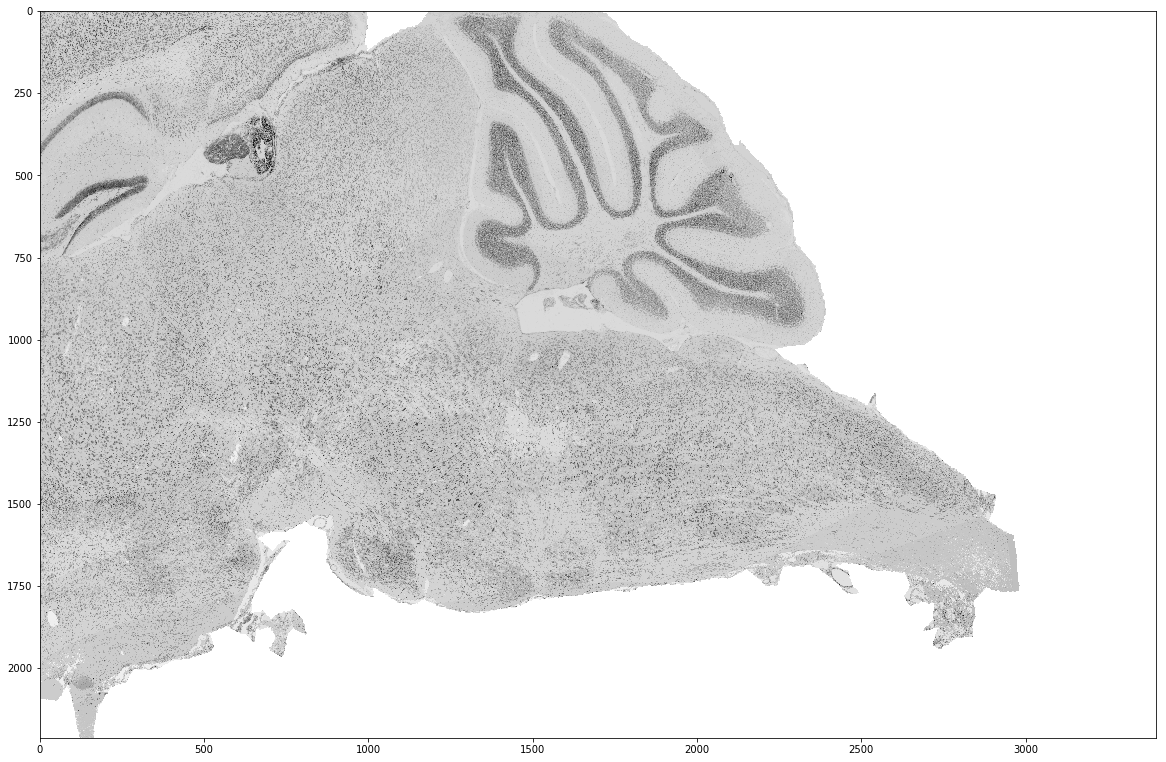

In [21]:
plt.figure(figsize=(20,20));
plt.imshow(img[::10, ::10], plt.cm.gray);

In [22]:
viz = DataManager.load_scoremap_viz_v2(stack='UCSD001', out_resolution='10.0um', 
                                       detector_id=799, prep_id=2, section=144, structure='12N')

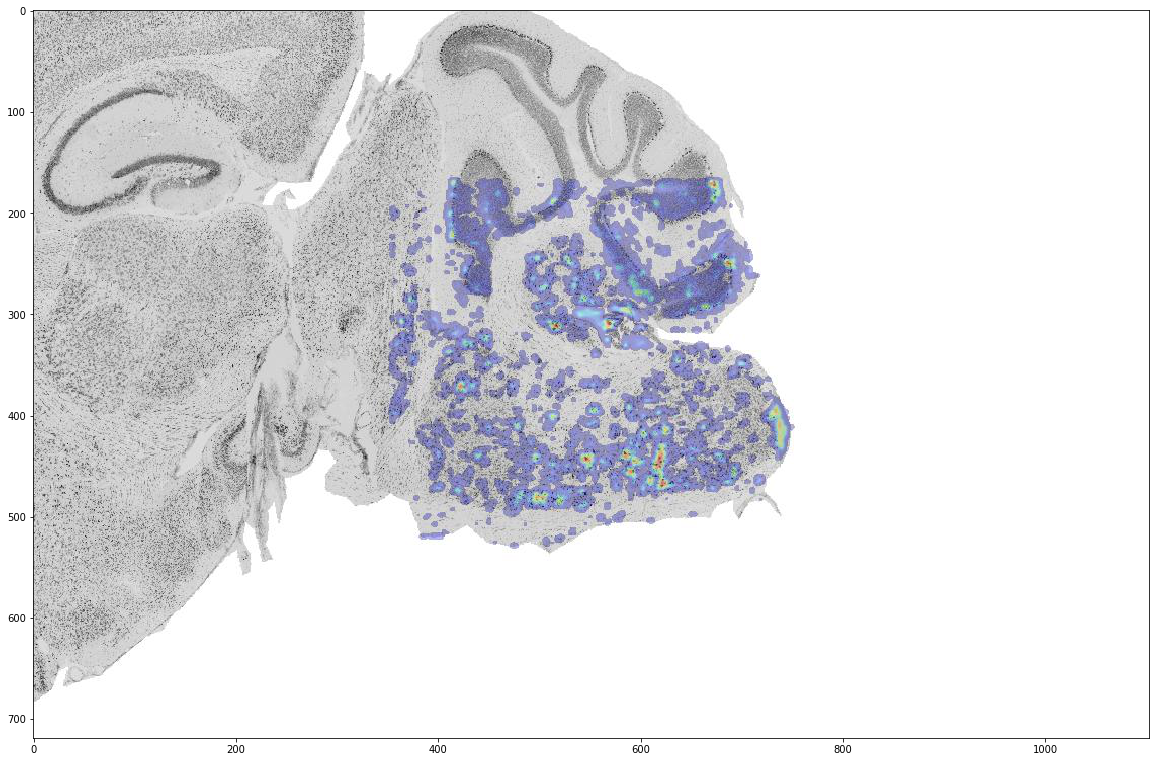

In [23]:
plt.figure(figsize=(20,20));
plt.imshow(viz);

In [25]:
viz = DataManager.load_scoremap_viz_v2(stack='UCSD001', out_resolution='10.0um', 
                                       detector_id=799, prep_id=2, section=144, structure='3N')

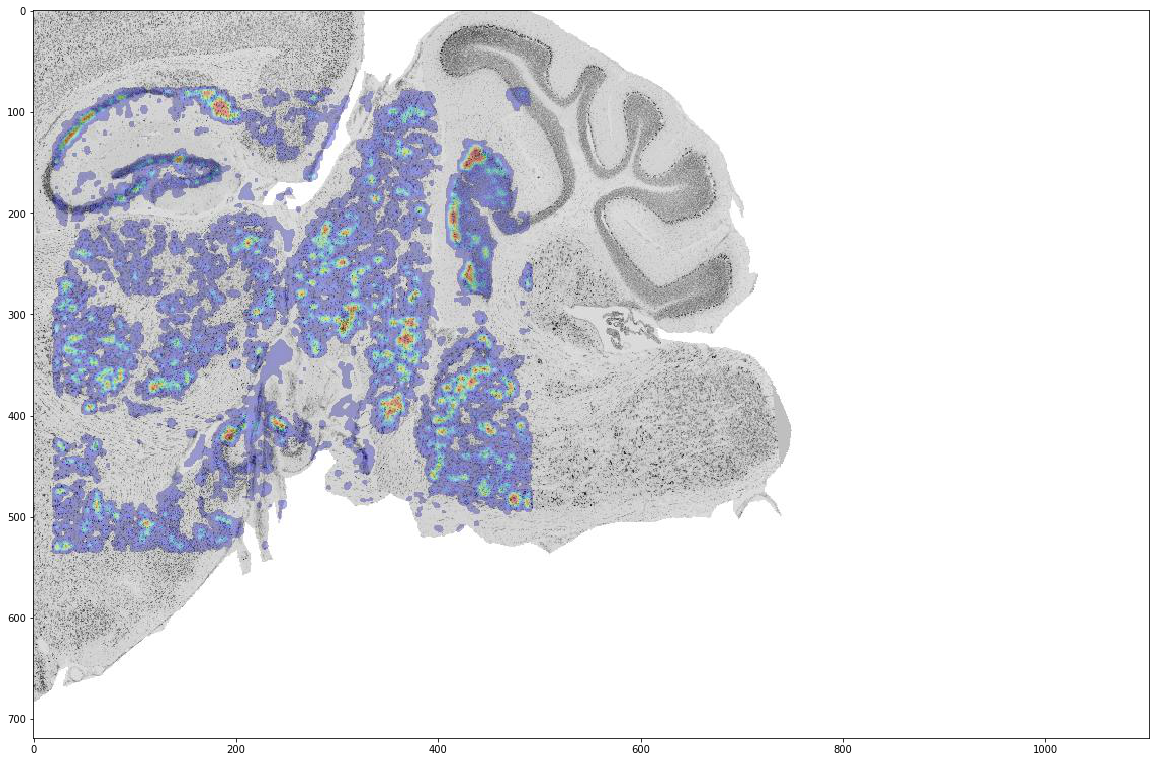

In [26]:
plt.figure(figsize=(20,20));
plt.imshow(viz);

In [ ]:
# IF SUCCESSFUL CONTINUE RUNNING SCRIPT_2